In [1]:
import librosa

In [2]:
array, sampling_rate = librosa.load(librosa.ex("trumpet"))

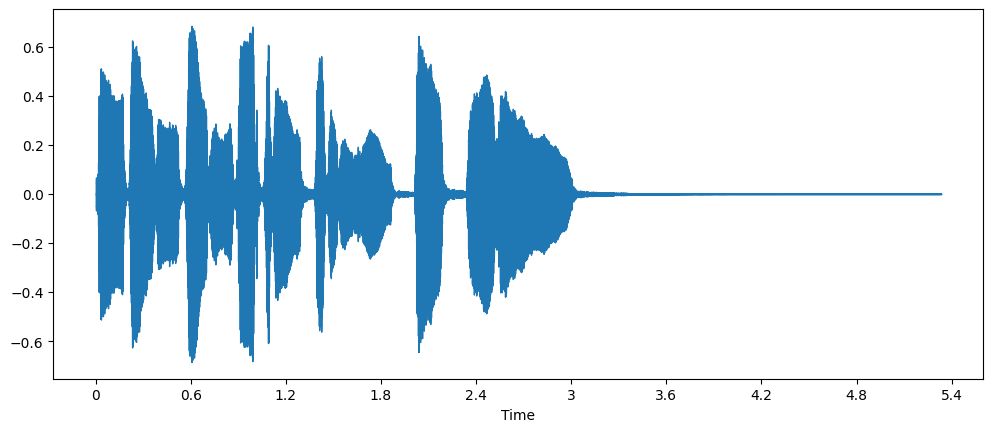

In [14]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

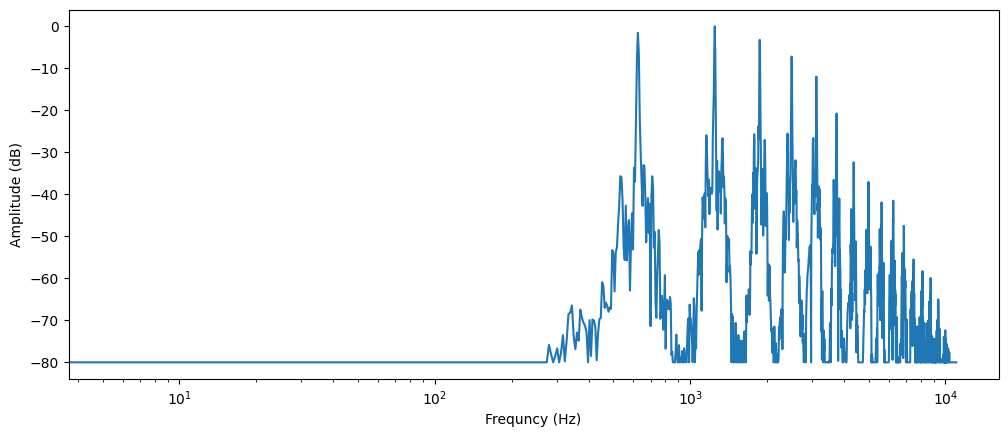

In [11]:
import numpy as np

dft_input = array[:4096]

#calculating the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

#fet the amplitude spretrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

#get the frequencyt bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel('Frequncy (Hz)')
plt.ylabel('Amplitude (dB)')
plt.xscale('log')

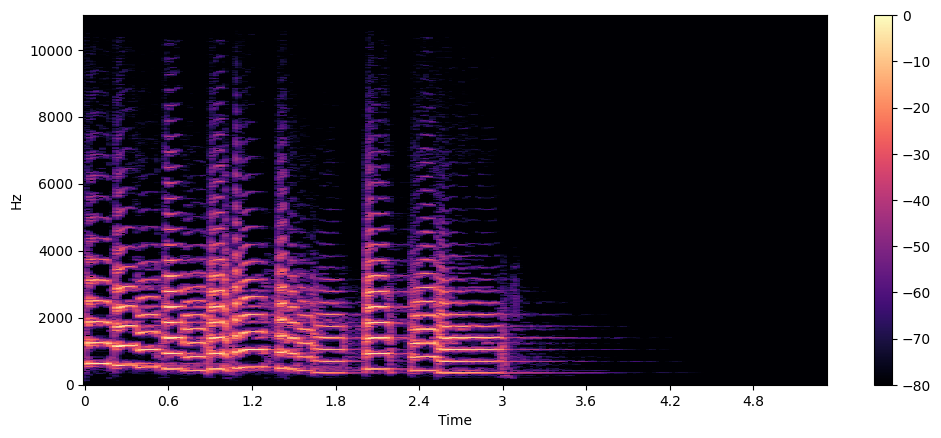

In [15]:
D = librosa.stft(array)

S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis='time', y_axis='hz')
plt.colorbar()

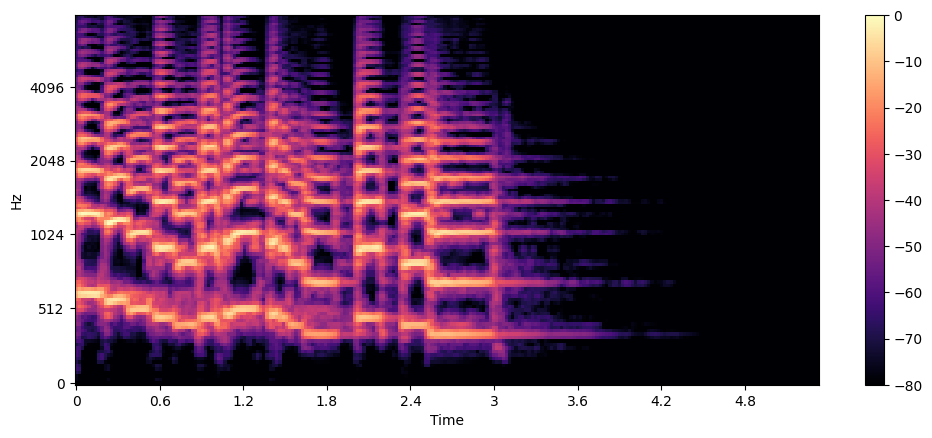

In [17]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_db = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=sampling_rate, fmax=8000)
plt.colorbar()